In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali_Sales_Data.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
print(df['Cust_name'].nunique())
print(df['User_ID'].nunique())
print(df['Product_ID'].nunique())

1250
3755
2351


In [7]:
subset = ['Gender','Age Group','Marital_Status','State','Zone','Occupation']
for i in subset:
    print(df[i].value_counts())
    print('-'*30)

Gender
F    7842
M    3409
Name: count, dtype: int64
------------------------------
Age Group
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: count, dtype: int64
------------------------------
Marital_Status
0    6522
1    4729
Name: count, dtype: int64
------------------------------
State
Uttar Pradesh       1946
Maharashtra         1526
Karnataka           1305
Delhi               1107
Madhya Pradesh       923
Andhra Pradesh       812
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              429
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: count, dtype: int64
------------------------------
Zone
Central     4296
Southern    2695
Western     1955
Northern    1491
Eastern      814
Name: count, dtype: int64
------------------------------
Occupation
IT Sector          1588
Healthcare    

In [8]:
df.drop(['User_ID','Cust_name','Status','unnamed1'], axis = 1, inplace=True)

In [9]:
df.columns

Index(['Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [10]:
df.isna().sum()

Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df['Amount'].fillna(df['Amount'].mean(), inplace=True)

In [12]:
df.isna().sum()

Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [13]:
df.describe(include='object')

,Product_ID,Gender,Age Group,State,Zone,Occupation,Product_Category
count,11251,11251,11251,11251,11251,11251,11251
unique,2351,2,7,16,5,15,18
top,P00265242,F,26-35,Uttar Pradesh,Central,IT Sector,Clothing & Apparel
freq,53,7842,4543,1946,4296,1588,2655


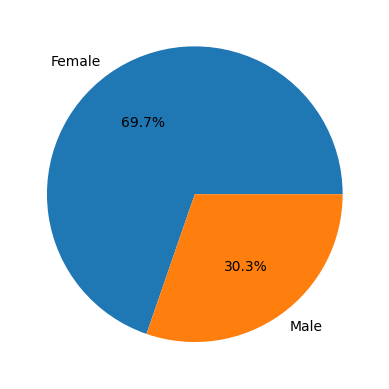

In [14]:
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%')
plt.show()

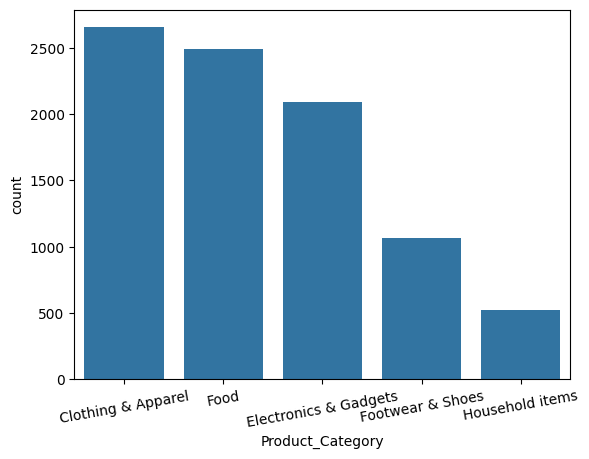

In [15]:
sns.countplot(x=df['Product_Category'], data=df.sort_values(by='Product_Category', ascending=False),order=df['Product_Category'].value_counts().nlargest(5).index)
plt.xticks(rotation=10)
plt.show()

In [16]:
df.columns

Index(['Product_ID', 'Gender', 'Age Group', 'Age', 'Marital_Status', 'State',
       'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [17]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

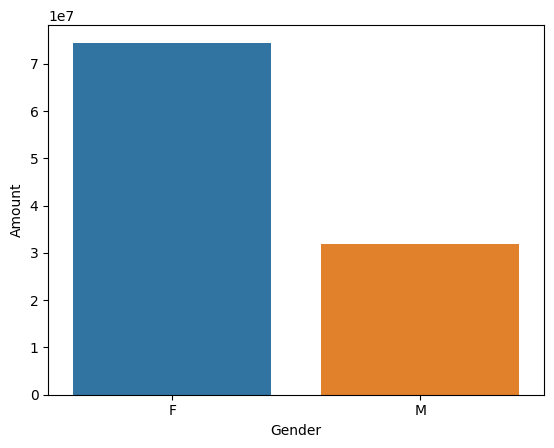

In [18]:
sns.barplot(x='Gender', y='Amount', data=sales_gen, hue='Gender')
plt.show()

<Axes: xlabel='Age Group', ylabel='count'>

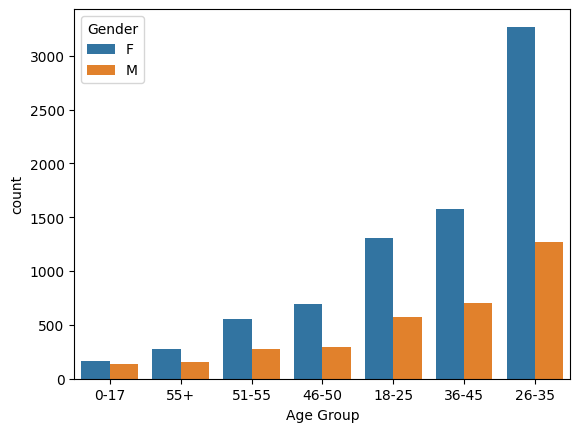

In [19]:
sns.countplot(data=df, x='Age Group', order=df['Age Group'].value_counts(ascending=True).index, hue='Gender')

<function matplotlib.pyplot.show(close=None, block=None)>

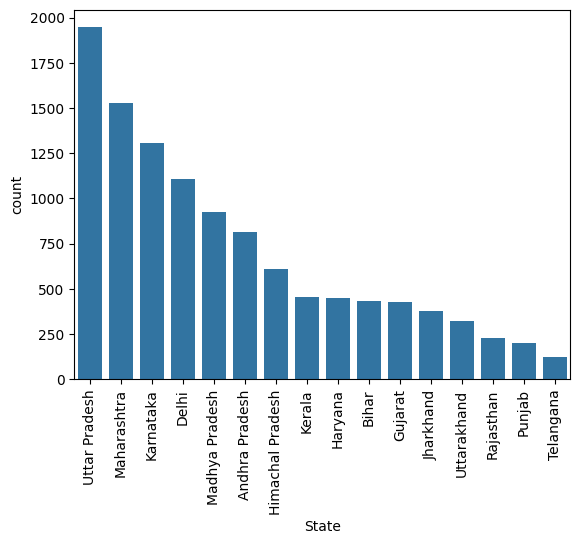

In [20]:
sns.countplot(x=df['State'], data=df,order=df['State'].value_counts(ascending=False).index)
plt.xticks(rotation='vertical')
plt.show

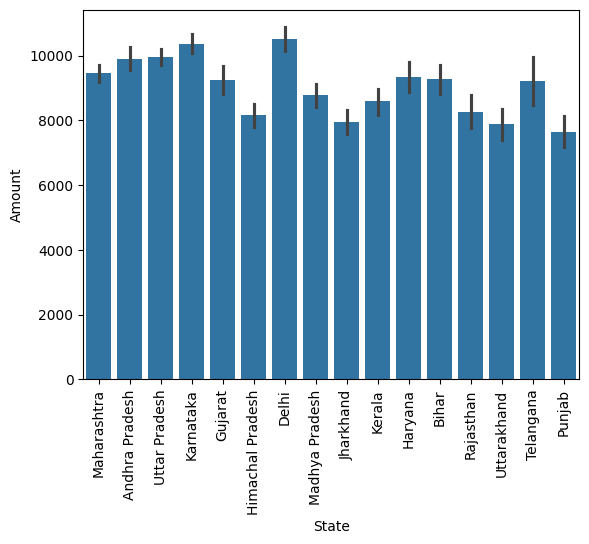

In [21]:
sns.barplot(x='State',y='Amount',data=df)#,order=df.groupby('State')['Amount'].sum().sort_values(ascending=False).index)
plt.xticks(rotation='vertical')
plt.show()

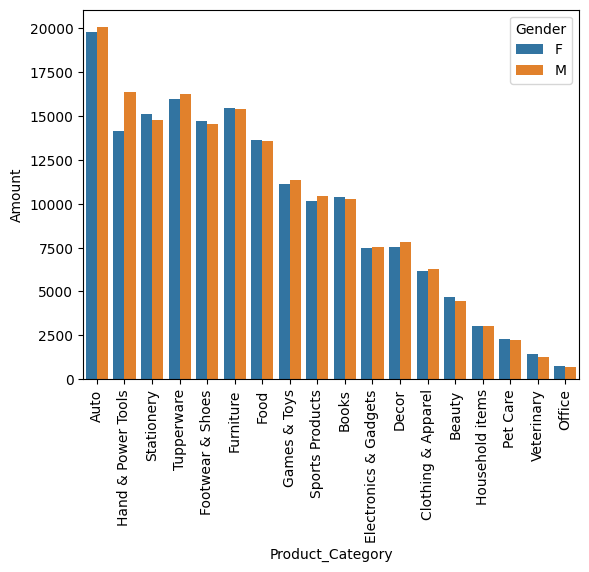

In [26]:
top_categories=sns.barplot(x='Product_Category', y='Amount', data=df, hue='Gender',errorbar=None)
plt.xticks(rotation='vertical')
plt.show()